<a href="https://colab.research.google.com/github/mahamtahir272/AnomalySense-Detector-for-Home-Security/blob/main/home_security_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv(r'/content/sample_data/balanced_sensor_data.csv')
df.head()

,temp,humidity,air_quality,light,loudness,year,month,time,risk_level,temp_deviation,light_condition,noise_level,danger_level,humidity_alert,time_of_day,anomaly_detection
0,22.62,63.00,75,626,146,2021,6,2021-06-16 01:13:16,Moderate,-4.9297,Dark,Normal,Safe,Safe,Night,Suspicious Noise 🚔
1,30.91,40.44,75,635,135,2021,6,2021-06-15 23:55:26,Moderate,3.3603,Bright,Normal,Safe,Safe,Night,Normal ✅
2,29.31,44.44,75,635,140,2021,6,2021-06-16 00:24:26,Moderate,1.7603,Bright,Normal,Safe,Safe,Night,Normal ✅
3,29.41,44.12,75,635,127,2021,6,2021-06-16 00:15:36,Moderate,1.8603,Bright,Normal,Safe,Safe,Night,Normal ✅
4,22.41,63.56,75,625,143,2021,6,2021-06-16 00:58:26,Moderate,-5.1397,Dark,Normal,Safe,Safe,Night,Suspicious Noise 🚔


In [ ]:
df.describe()

,temp,humidity,air_quality,light,loudness,year,month,temp_deviation
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,29.863660,49.386040,75.0,631.795000,155.339000,2021.0,6.0,0.313960
std,6.805952,12.626033,0.0,6.172931,32.259243,0.0,0.0,5.497047
min,22.220000,28.380000,75.0,625.000000,55.000000,2021.0,6.0,-5.329700
25%,23.022500,41.362500,75.0,626.000000,134.000000,2021.0,6.0,-4.609700
50%,29.440000,44.500000,75.0,634.000000,145.000000,2021.0,6.0,1.480300
75%,33.880000,61.310000,75.0,635.000000,167.000000,2021.0,6.0,2.860300
max,48.160000,64.060000,75.0,646.000000,257.000000,2021.0,6.0,10.610300


In [ ]:
#data types checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               1000 non-null   float64
 1   humidity           1000 non-null   float64
 2   air_quality        1000 non-null   int64  
 3   light              1000 non-null   int64  
 4   loudness           1000 non-null   int64  
 5   year               1000 non-null   int64  
 6   month              1000 non-null   int64  
 7   time               1000 non-null   object 
 8   risk_level         1000 non-null   object 
 9   temp_deviation     1000 non-null   float64
 10  light_condition    1000 non-null   object 
 11  noise_level        1000 non-null   object 
 12  danger_level       1000 non-null   object 
 13  humidity_alert     1000 non-null   object 
 14  time_of_day        1000 non-null   object 
 15  anomaly_detection  1000 non-null   object 
dtypes: float64(3), int64(5), 

In [ ]:
#consistency checking
df.count()

,0
temp,1000
humidity,1000
air_quality,1000
light,1000
loudness,1000
year,1000
month,1000
time,1000
risk_level,1000
temp_deviation,1000


In [ ]:
num_null_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one null value: {num_null_rows}")


Number of rows with at least one null value: 0


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify if duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows: 273
Number of duplicate rows after removal: 0


In [ ]:
#feature extraction
df.describe()

,temp,humidity,air_quality,light,loudness,year,month,temp_deviation
count,727.000000,727.000000,727.0,727.000000,727.000000,727.0,727.0,727.000000
mean,30.501678,49.682558,75.0,631.623109,163.250344,2021.0,6.0,0.200946
std,7.165395,12.678346,0.0,6.178557,33.944787,0.0,0.0,5.534462
min,22.220000,28.380000,75.0,625.000000,55.000000,2021.0,6.0,-5.329700
25%,23.030000,41.380000,75.0,626.000000,138.000000,2021.0,6.0,-4.669700
50%,29.940000,58.190000,75.0,628.000000,152.000000,2021.0,6.0,-3.669700
75%,35.925000,61.310000,75.0,635.000000,200.000000,2021.0,6.0,2.890300
max,48.160000,64.060000,75.0,646.000000,257.000000,2021.0,6.0,10.610300


In [ ]:
df['time'] = pd.to_datetime(df['time'])


PERFORMING FEATURE EXTRACTION TO CREATE NEW FEATURES LIKE DAY_OF_RIME , HOUR , MINUTES   

In [ ]:
import pandas as pd

def categorize_time_of_day(row):
    hour = pd.to_datetime(row['time']).hour  # Extract hour from time

    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:  # 8 PM - 6 AM
        return 'Night'

# Apply function to create the new column
df['time_of_day'] = df.apply(categorize_time_of_day, axis=1)


In [ ]:
df.head()

,temp,humidity,air_quality,light,loudness,year,month,time,risk_level,temp_deviation,light_condition,noise_level,danger_level,humidity_alert,time_of_day,anomaly_detection
0,22.62,63.00,75,626,146,2021,6,2021-06-16 01:13:16,Moderate,-4.9297,Dark,Normal,Safe,Safe,Night,Suspicious Noise 🚔
1,30.91,40.44,75,635,135,2021,6,2021-06-15 23:55:26,Moderate,3.3603,Bright,Normal,Safe,Safe,Night,Normal ✅
2,29.31,44.44,75,635,140,2021,6,2021-06-16 00:24:26,Moderate,1.7603,Bright,Normal,Safe,Safe,Night,Normal ✅
3,29.41,44.12,75,635,127,2021,6,2021-06-16 00:15:36,Moderate,1.8603,Bright,Normal,Safe,Safe,Night,Normal ✅
4,22.41,63.56,75,625,143,2021,6,2021-06-16 00:58:26,Moderate,-5.1397,Dark,Normal,Safe,Safe,Night,Suspicious Noise 🚔


In [ ]:
df['noise_intensity'] = df['loudness'].apply(lambda x:
    1 if x < 100 else   # Silent
    2 if x < 300 else   # Low Noise
    3 if x < 600 else   # Normal
    4 if x < 800 else   # High Noise 🚨
    5                  # Very High Noise 🚔 (Suspicious)
)


In [ ]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract numerical features
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['day_of_week'] = df['time'].dt.dayofweek
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x > 20 else 0)  # 1 for night

# Drop original 'time' column (since we extracted useful features)
df = df.drop(columns=['time'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               727 non-null    float64
 1   humidity           727 non-null    float64
 2   air_quality        727 non-null    int64  
 3   light              727 non-null    int64  
 4   loudness           727 non-null    int64  
 5   year               727 non-null    int64  
 6   month              727 non-null    int64  
 7   risk_level         727 non-null    object 
 8   temp_deviation     727 non-null    float64
 9   light_condition    727 non-null    object 
 10  noise_level        727 non-null    object 
 11  danger_level       727 non-null    object 
 12  humidity_alert     727 non-null    object 
 13  time_of_day        727 non-null    object 
 14  anomaly_detection  727 non-null    object 
 15  noise_intensity    727 non-null    int64  
 16  hour               727 non-null

In [ ]:
(df['anomaly_detection']=='Fire Alert 🔥').sum()

200

USING RANDOM FOREST and correlation TO drop dominant FEATURES and select necessary FROM OUR DATASET


Highly Correlated Features to Drop: {'light', 'day_of_week', 'danger_level', 'risk_level', 'temp_deviation', 'light_condition'}

Most Dominant Feature to Drop: loudness

Decoded DataFrame Head:
     temp  humidity  air_quality  year  month noise_level humidity_alert  \
0  22.62     63.00           75  2021      6      Normal           Safe   
1  30.91     40.44           75  2021      6      Normal           Safe   
2  29.31     44.44           75  2021      6      Normal           Safe   
3  29.41     44.12           75  2021      6      Normal           Safe   
4  22.41     63.56           75  2021      6      Normal           Safe   

  time_of_day  noise_intensity  hour  minute  is_night   anomaly_detection  
0       Night                2     1      13         1  Suspicious Noise 🚔  
1       Night                2    23      55         1            Normal ✅  
2       Night                2     0      24         1            Normal ✅  
3       Night                2     0      15 

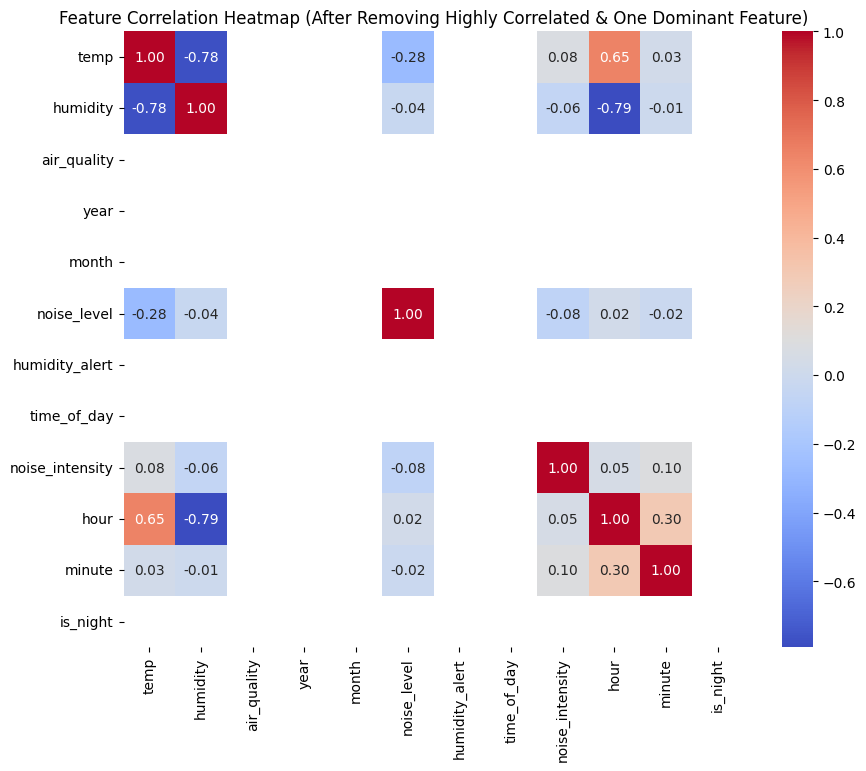

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Copy the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Encode categorical features using Label Encoding
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders to decode later

# Define features and target
X = df_encoded.drop(columns=['anomaly_detection'])  # Exclude target column
y = df_encoded['anomaly_detection']  # Target variable

# Compute correlation matrix
corr_matrix = X.corr()

# Identify highly correlated features (threshold = 0.85)
threshold = 0.85
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_features.add(corr_matrix.columns[i])

print("\nHighly Correlated Features to Drop:", high_corr_features)

# Drop highly correlated features
X_filtered = X.drop(columns=high_corr_features, errors='ignore')

# Train Random Forest model to compute feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_filtered, y)

# Compute feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_filtered.columns).sort_values(ascending=False)

# Identify the most dominant feature (only one)
most_dominant_feature = feature_importance.idxmax()

print("\nMost Dominant Feature to Drop:", most_dominant_feature)

# Drop only one dominant feature
X_final = X_filtered.drop(columns=[most_dominant_feature], errors='ignore')
# Add the target variable back to the final dataframe
df_final = X_final.copy()
df_final['anomaly_detection'] = y
# Decode categorical values back to original form
for col, le in label_encoders.items():
    if col in df_final.columns:  # Only decode if the column is still in the final dataframe
        df_final[col] = le.inverse_transform(df_final[col])

print("\nDecoded DataFrame Head:\n", df_final.head())

print("\nFinal DataFrame Shape:", df_final.shape)


# Plot correlation heatmap after removing correlated & dominant features
plt.figure(figsize=(10, 8))
sns.heatmap(X_final.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (After Removing Highly Correlated & One Dominant Feature)")
plt.show()


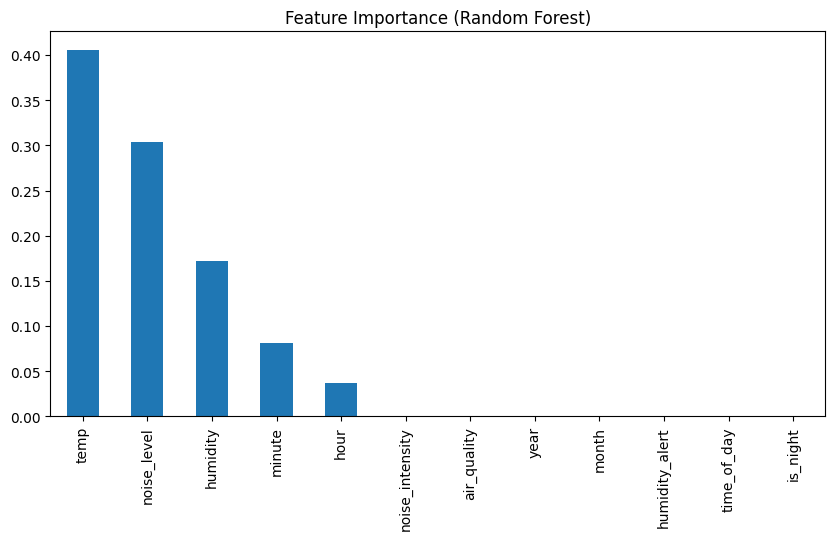

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot feature importance
plt.figure(figsize=(10, 5))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()



> Add blockquote



REMOVING FEATURES WITH LOW IMPORTANCE

In [ ]:
# Define a threshold for low importance
low_importance_threshold = 0.01
low_importance_features = feature_importances[feature_importances < low_importance_threshold].index.tolist()

print("Removing low-importance features from DataFrame:", low_importance_features)

# Drop low-importance features from the original DataFrame
df_backup = df_final.copy()  # Create a backup
df_final = df_final.drop(columns=low_importance_features, errors='ignore')


Removing low-importance features from DataFrame: ['air_quality', 'year', 'month', 'humidity_alert', 'time_of_day', 'noise_intensity', 'is_night']




```
# This is formatted as code
```



In [ ]:
df_final.head()

,temp,humidity,noise_level,hour,minute,anomaly_detection
0,22.62,63.00,Normal,1,13,Suspicious Noise 🚔
1,30.91,40.44,Normal,23,55,Normal ✅
2,29.31,44.44,Normal,0,24,Normal ✅
3,29.41,44.12,Normal,0,15,Normal ✅
4,22.41,63.56,Normal,0,58,Suspicious Noise 🚔


:APPLYING RANDOM FOREST MODEL FOR ANOMALY DETECTION


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset (assuming df_final is your preprocessed dataframe)
df_final = df_final.drop_duplicates().reset_index(drop=True)  # Remove duplicates

# Ensure target column exists
target_col = 'anomaly_detection'
if target_col not in df_final.columns:
    raise KeyError(f"Target column '{target_col}' not found in DataFrame!")

# Step 1: Split into train & test sets
train_df, test_df = train_test_split(df_final, test_size=0.2, random_state=42, stratify=df_final[target_col])

# Step 2: Identify categorical columns and encode them
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])  # Transform test data using the same encoder
    label_encoders[col] = le
    joblib.dump(le, f'label_encoder_{col}.pkl')  # Save the encoder to a file

# Step 3: Define Features & Target
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 5: Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid,
                              n_iter=20, cv=5, verbose=2, n_jobs=-1)
rf_tuned.fit(X_train_resampled, y_train_resampled)

# Get best parameters
print("\nBest Parameters:", rf_tuned.best_params_)

# Step 7: Train Final Random Forest Model with Best Parameters
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    bootstrap=True,
    class_weight='balanced',  # Adjust for class imbalance
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Step 8: Make Predictions
y_pred_filtered = rf_model.predict(X_test)

# Step 9: Evaluate Model
print("\nClassification Report:\n", classification_report(y_test, y_pred_filtered))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_filtered))

# Step 10: Decode Categorical Values Back to Original Form
for col, le in label_encoders.items():
    if col in df_final.columns:  # Only decode if the column is still in the final dataframe
        train_df[col] = le.inverse_transform(train_df[col])
        test_df[col] = le.inverse_transform(test_df[col])
joblib.dump(rf_model, 'random_forest_model.pkl')  # Save the model

print("\nDecoded Test DataFrame Head:\n", test_df.head())


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.64      0.89      0.74        18
           3       0.43      0.26      0.32        23
           4       0.67      0.87      0.75        23

    accuracy                           0.81       144
   macro avg       0.75      0.78      0.75       144
weighted avg       0.81      0.81      0.80       144


Accuracy Score: 0.8125

Decoded Test DataFrame Head:
       temp  humidity noise_level  hour  minute          anomaly_detection
107  32.41     63.25      Normal     1      12               Fire Alert 🔥
613  37.69     29.19        Loud    23      22               High Noise 🚨
360  22.31     61.31   

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on resampled training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)

# Print the accuracy for each fold and the mean accuracy
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.77586207 0.79310345 0.82758621 0.68421053 0.80701754 0.78947368
 0.80701754 0.80701754 0.75438596 0.71929825]
Mean CV Accuracy: 0.7765


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.64      0.89      0.74        18
           3       0.43      0.26      0.32        23
           4       0.67      0.87      0.75        23

    accuracy                           0.81       144
   macro avg       0.75      0.78      0.75       144
weighted avg       0.81      0.81      0.80       144



post tuning

In [ ]:
(df_final['anomaly_detection'] =='Fire Alert 🔥').sum()

198

In [ ]:
duplicates = X_test.merge(X_train, how='inner')

if not duplicates.empty:
    print("⚠️ Data leakage detected again! Check your splitting process.")
else:
    print("✅ No data leakage detected. Train and test sets are clean.")


✅ No data leakage detected. Train and test sets are clean.


In [ ]:
duplicates = X_test.merge(X_train, how='inner')
print(f"Duplicate samples between train and test: {duplicates.shape[0]}")


Duplicate samples between train and test: 0


In [ ]:
train_score = rf_model.score(X_train, y_train)  # Use resampled training data
test_score = rf_model.score(X_test, y_test)  # Use original test data

print(f"Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")


Train Accuracy: 0.8813, Test Accuracy: 0.8125


In [ ]:
df_final['anomaly_detection'].unique()

array(['Suspicious Noise 🚔', 'Normal ✅', 'Fire Alert 🔥', 'High Noise 🚨',
       'Unusual Humidity Change 💧'], dtype=object)

In [ ]:
import pandas as pd

# Define one unseen fire alert data sample
unseen_data = pd.DataFrame({
    'temp': [100],          # Numeric feature
    'humidity': [100.12],      # Numeric feature
    'noise_level': ['Loud'],  # Categorical feature (needs encoding)
    'hour': [12],              # Numeric feature
    'minute': [60]            # Numeric feature
})

# Step 1: Apply Label Encoding (for categorical columns)
if 'label_encoders' in globals():
    for col in ['noise_level']:  # Only apply encoding to categorical features
        unseen_data[col] = label_encoders[col].transform(unseen_data[col])

# Step 2: Apply Scaling (if applicable)
if 'scaler' in globals():
    unseen_data_scaled = scaler.transform(unseen_data)
else:
    unseen_data_scaled = unseen_data  # If no scaling was used

# Step 3: Predict using trained Random Forest model
prediction = rf_model.predict(unseen_data_scaled)

# Step 4: Decode Prediction (if target variable was encoded)
if 'target_encoder' in globals():
    predicted_label = target_encoder.inverse_transform([prediction[0]])[0]
else:
    predicted_label = prediction[0]

# Display prediction result
unseen_data['Predicted_Anomaly'] = predicted_label
print("\nPrediction on Unseen Fire Alert Data:\n", unseen_data)



Prediction on Unseen Fire Alert Data:
    temp  humidity  noise_level  hour  minute  Predicted_Anomaly
0   100    100.12            0    12      60                  0


In [ ]:
print(df_final[df_final['anomaly_detection']== 'Unusual Humidity Change 💧'])


      temp  humidity noise_level  hour  minute          anomaly_detection
16   23.06     62.12      Normal     0      54  Unusual Humidity Change 💧
19   22.66     62.88      Normal     1       4  Unusual Humidity Change 💧
23   22.66     63.00      Normal     1       6  Unusual Humidity Change 💧
24   22.94     62.81      Normal     0      41  Unusual Humidity Change 💧
29   22.34     63.81      Normal     1       1  Unusual Humidity Change 💧
..     ...       ...         ...   ...     ...                        ...
679  22.66     61.25      Normal     1      40  Unusual Humidity Change 💧
688  22.47     63.69      Normal     1       1  Unusual Humidity Change 💧
698  23.03     62.69      Normal     0      38  Unusual Humidity Change 💧
702  22.88     62.19      Normal     0      53  Unusual Humidity Change 💧
704  22.78     60.62      Normal     1      33  Unusual Humidity Change 💧

[116 rows x 6 columns]


SAVING MY MODEL

In [ ]:
import joblib

# Save your trained Random Forest model
#joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved successfully in the current directory!")


Model saved successfully in the current directory!


In [ ]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'label_encoder_noise_level.pkl', 'random_forest_model.pkl', 'target_encoder.pkl', 'sample_data']


In [ ]:
import os
print(os.path.abspath("random_forest_model.pkl"))


/content/random_forest_model.pkl


TESTING ON NOVEL DATA

In [ ]:
import pandas as pd

# Load new data
unseen_data = pd.DataFrame({
    'temp': [80],          # Numeric feature
    'humidity': [100.19],   # Numeric feature
    'noise_level': [0],  # Categorical feature (needs encoding)
    'hour': [4],              # Numeric feature
    'minute': [40]            # Numeric feature
})
# Apply the same preprocessing as training (scaling, encoding, feature selection, etc.)


In [ ]:
import joblib

# Load the saved model
rf_loaded_model = joblib.load('random_forest_model.pkl')

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# Predict using the loaded model
predictions = rf_loaded_model.predict(unseen_data)

# Print or save predictions
print(predictions)


[0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df_final' contains the column 'noiselevel' (your feature)
label_encoder_noiselevel = LabelEncoder()

# Fit and transform the 'noiselevel' column
encoded_noiselevel = label_encoder_noiselevel.fit_transform(df_final['noise_level'])

# Create a dictionary of original labels and their corresponding encoded labels
noiselevel_mapping = dict(zip(label_encoder_noiselevel.classes_, range(len(label_encoder_noiselevel.classes_))))

print("Noiselevel Encoding Mapping:")
for original_label, encoded_value in noiselevel_mapping.items():
    print(f"{original_label} -> {encoded_value}")

# Example to check decoding
decoded_noiselevel = label_encoder_noiselevel.inverse_transform(encoded_noiselevel)
#print("\nDecoded Noiselevel Labels:", decoded_noiselevel)


Noiselevel Encoding Mapping:
Loud -> 0
Normal -> 1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df_final' contains the column 'anomaly_detection' (your target feature)
label_encoder = LabelEncoder()

# Fit and transform the 'anomaly_detection' column
encoded_labels = label_encoder.fit_transform(df_final['anomaly_detection'])

# Create a dictionary of original labels and their corresponding encoded labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Label Encoding Mapping:")
for original_label, encoded_value in label_mapping.items():
    print(f"{original_label} -> {encoded_value}")

# Example to check decoding
decoded_labels = label_encoder.inverse_transform(encoded_labels)
#print("\nDecoded Labels:", decoded_labels)


Label Encoding Mapping:
Fire Alert 🔥 -> 0
High Noise 🚨 -> 1
Normal ✅ -> 2
Suspicious Noise 🚔 -> 3
Unusual Humidity Change 💧 -> 4


In [ ]:
df_final.columns


Index(['temp', 'humidity', 'noise_level', 'hour', 'minute',
       'anomaly_detection'],
      dtype='object')